<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Prepare data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
!pip install -U opendatasets  --quiet

In [4]:
import opendatasets as od
import os 

url = 'https://www.kaggle.com/c/titanic/data'
data_dir = od.download(url)

100%|██████████| 34.1k/34.1k [00:00<00:00, 9.73MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic


In [5]:
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
data = train_df.drop(columns=['Survived'], axis=1)
target = train_df.Survived

In [9]:
data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
target.isna().sum()

0

In [12]:
target.value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [13]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# Variables inspection

In [15]:
!pip install -U yellowbrick --quiet

     |████████████████████████████████| 274 kB 26.4 MB/s 


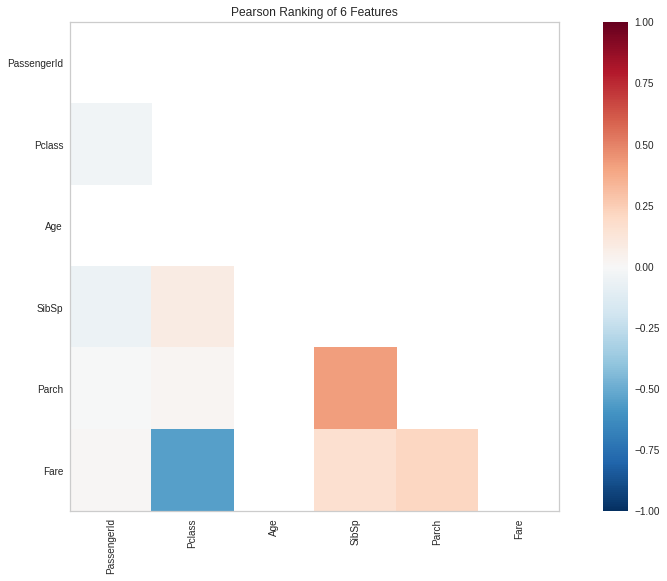

In [17]:
# redundancy between variables
# correlations between pairs of variables

from sklearn.compose import make_column_selector as selector
from yellowbrick.features import Rank2D

num_features = selector(dtype_include='number')(data)
cat_features = selector(dtype_include='object')(data)
_, r2d = plt.subplots(figsize=(14, 9))
r2d = Rank2D()
r2d.fit_transform(data[num_features])
r2d.show()

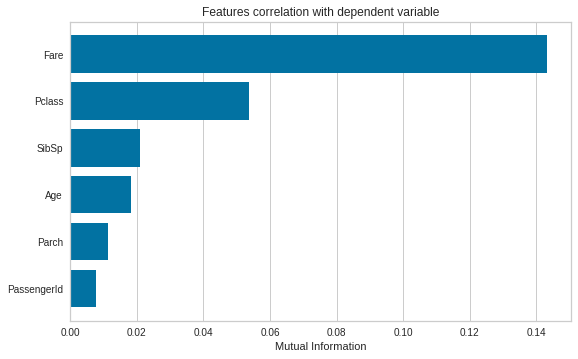

In [21]:
# pertinence with target

from yellowbrick.target import FeatureCorrelation
fc = FeatureCorrelation(method='mutual_info-classification', sort=True)
fc.fit(data[num_features].fillna(value=data[num_features].mean()), 
       target, discrete_features=False)
fc.show()